In [108]:
import numpy as np
import scipy as sp 
from matplotlib import pyplot as plt

In [131]:
# define relevant constants
n = 1000
sigma_2 = 1
sigma = np.sqrt(sigma_2)
m = 9
k = 10

In [132]:
#helpful functions!
def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X
def designvector(x_input,m):
    dvector = np.vstack([1]).T
    for i in range(m):
        dvector = np.vstack([dvector.T, x_input**(i+1)]).T
    return dvector

In [133]:
# generate sample data 
noise = np.random.normal(0,sigma,n)
x = np.random.uniform(-1,1,size=n)
y = np.sin(2*np.pi*x) + noise

In [134]:
#generate matrices containing bias functions, variance functions, and MSE
avg_bias_2, avg_variance, avg_testMSE= np.zeros(m),  np.zeros(m),  np.zeros(m)

for p in range(m):
    testMSE = np.zeros(k)
    
    X = designmatrix(x, p+1)
    
    #iterate over the k-fold set
    for i in range(k):
        
        #split data using k-blocks, taking the i-th for testing and the rest for training.
        x_train = np.concatenate((x[0:100*i], x[100*(i+1):1000]))
        y_train = np.concatenate((y[0:100*i], y[100*(i+1):1000]))
        x_test = x[100*i:100*(i+1)]
        y_test = y[100*i:100*(i+1)]
        
        #design matrices
        X_train = designmatrix(x_train, p+1)
        X_test = designmatrix(x_test, p+1)
        
        #compute coefficients
        w = np.linalg.lstsq(X_train,y_train, rcond=None)[0]
        
        #store coefficients
        if (i == 0):
            mw = w
        else:
            mw = np.vstack([mw.T, w]).T
        
        #compute MSE
        testMSE[i] = (1 / len(x_test)) * (y_test - X_test @ w).T @ (y_test - X_test @ w)
    
    #values on which we evaluate each model, the average model, and the true underlying model (w/o noise)
    values = np.linspace(-1,1,50)
    testmatrix = designmatrix(values, p+1) #design matrix for these values
    
    #compute fold-averaged bias using formula
    average_model = np.average(mw,axis=1)
    avg_bias_2[p] = (1 / len(values)) * sum((testmatrix @ average_model - np.sin(2*np.pi*values))**2)
    
    #compute fold-averaged variance using double-sum formula
    variance = 0
    values = np.linspace(-1,1,50)
    for x_value in values:
        inner = 0
        for model_index in range(k): 
            inner = inner + (designvector(x_value, p+1) @ mw[:,model_index] - designvector(x_value, p+1) @ average_model)**2
        variance = variance + inner 
    avg_variance[p] = variance / k
    
    #compute fold-averaged MSE values  
    avg_testMSE[p] = np.average(testMSE)


C:\Users\asaha1203\AppData\Local\Temp\ipykernel_184392\1981222251.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  avg_variance[p] = variance / k


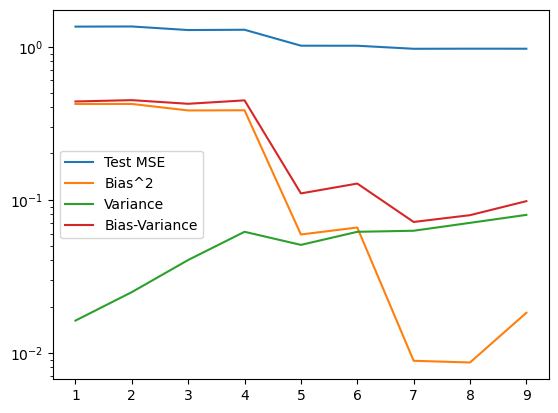

In [136]:
#plot bias^2, variance, bias^2 + variance, and test MSE
x_axis = list(range(1,m+1))

#plot graphs
plt.plot(x_axis, avg_testMSE, label='Test MSE')
plt.plot(x_axis, avg_bias_2, label='Bias^2')
plt.plot(x_axis, avg_variance, label='Variance')
plt.plot(x_axis, avg_bias_2 + avg_variance, label='Bias-Variance')
plt.yscale("log")

plt.legend()

In [139]:
order = 7
number = 2000
lmbdarange = np.linspace(0,3,number)

r_avg_bias_2, r_avg_variance, r_avg_testMSE= np.zeros(number),  np.zeros(number),  np.zeros(number)

for index in range(number):
    testMSE = np.zeros(k)
    
    X = designmatrix(x, order)
    
    #iterate over the k-fold set
    for i in range(k):
        
        #split data using k-blocks, taking the i-th for testing and the rest for training.
        x_train = np.concatenate((x[0:100*i], x[100*(i+1):1000]))
        y_train = np.concatenate((y[0:100*i], y[100*(i+1):1000]))
        x_test = x[100*i:100*(i+1)]
        y_test = y[100*i:100*(i+1)]
        
        #design matrices
        X_train = designmatrix(x_train, order)
        X_test = designmatrix(x_test, order)
        
        #compute coefficients
        w = np.linalg.inv(X_train.T @ X_train + lmbdarange[index] * np.identity(order + 1)) @ X_train.T @ y_train
        
        #store coefficients
        if (i == 0):
            mw = w
        else:
            mw = np.vstack([mw.T, w]).T
        
        #compute MSE
        testMSE[i] = (1 / len(x_test)) * (y_test - X_test @ w).T @ (y_test - X_test @ w)
    
    #values on which we evaluate each model, the average model, and the true underlying model (w/o noise)
    values = np.linspace(-1,1,50)
    testmatrix = designmatrix(values, order) #design matrix for these values
    
    #compute bias using formula
    average_model = np.average(mw,axis=1)
    r_avg_bias_2[index] = (1 / len(values)) * sum((testmatrix @ average_model - np.sin(2*np.pi*values))**2)
    
    #compute variance using double-sum formula
    variance = 0
    values = np.linspace(-1,1,50)
    for x_value in values:
        inner = 0
        for model_index in range(k): 
            inner = inner + (designvector(x_value, order) @ mw[:,model_index] - designvector(x_value, order) @ average_model)**2
        variance = variance + inner 
    r_avg_variance[index] = variance / k
    
    r_avg_testMSE[index] = np.average(testMSE)

C:\Users\asaha1203\AppData\Local\Temp\ipykernel_184392\3627652042.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r_avg_variance[index] = variance / k


C:\Users\asaha1203\AppData\Local\Temp\ipykernel_184392\2144493721.py:1: RuntimeWarning: divide by zero encountered in log
  x_axis = np.log(lmbdarange)


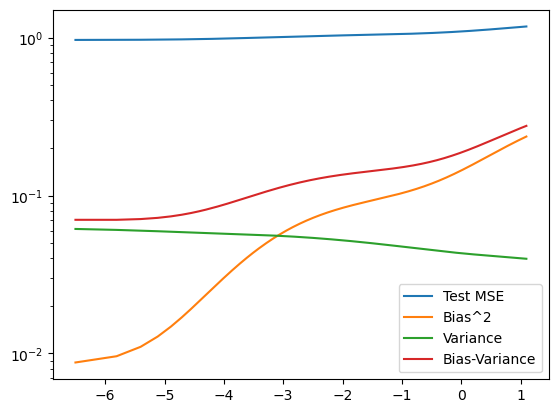

In [140]:
x_axis = np.log(lmbdarange)

plt.plot(x_axis, r_avg_testMSE, label='Test MSE')
plt.plot(x_axis, r_avg_bias_2, label='Bias^2')
plt.plot(x_axis, r_avg_variance, label='Variance')
plt.plot(x_axis, r_avg_bias_2 + r_avg_variance, label='Bias-Variance')
plt.yscale("log")

plt.legend()